In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('mkt_data.csv')

In [40]:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


- How much data do we have? Rows and columns
- What are the numerical columns?
- Do we have duplicates in our dataset?
- Do we have null values in this dataset? Could they indicate something? What should we do with them?
- What are the mean, median, 25th percentile, 75th percentile, minimum, and maximum of each numerical column?

In [41]:
df.shape

(2205, 44)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [43]:
df = df.drop('Unnamed: 0', axis=1)

In [44]:
df.duplicated().sum()

np.int64(184)

In [45]:
df = df.drop_duplicates()

In [46]:
df.isnull().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1807
marital_Married         1236
marital_Single          1578
marital_Together        1512
marital_Widow           1951
education_2n Cycle      1838
education_Basic         1972
education_Graduation    1006
education_Mast

The null values mentioned above may indicate that the person does not have that particular characteristic. Note that these columns only have null values or one other specific value. For example:

In [47]:
df['marital_Single'].value_counts()


marital_Single
4.0    443
Name: count, dtype: int64

The column "marital_Single" only contains the number 4.0, which appears 443 times. The rest are null values. This is a strong indication that the null values mean the person does not have that specific characteristic.

Therefore, these columns can be converted into a boolean format — 1 if true and 0 if false (null).

In [48]:
null_columns =["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

for n in null_columns:
    df["booleano "+str(n)] = np.where(df[n].isnull(), 0, 1)

In [49]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,booleano marital_Divorced,booleano marital_Married,booleano marital_Single,booleano marital_Together,booleano marital_Widow,booleano education_2n Cycle,booleano education_Basic,booleano education_Graduation,booleano education_Master,booleano education_PhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,1,0,0,0,0,1,0,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,1,0,0,0,0,0,1,0,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,0,0,0,0,1,0,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,0,0,0,1,0


In [50]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,booleano marital_Divorced,booleano marital_Married,booleano marital_Single,booleano marital_Together,booleano marital_Widow,booleano education_2n Cycle,booleano education_Basic,booleano education_Graduation,booleano education_Master,booleano education_PhD
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.105888,0.388422,0.219198,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.307771,0.487512,0.413806,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Understanding our customer profile better:

- What is the highest salary found in our dataset?
- What is the salary distribution in our dataset?
- Do our customers have higher or lower education levels?
- How many customers do we have in each marital statu

In [51]:
# Highest salary in the dataset
df['Income'].max()

np.float64(113734.0)

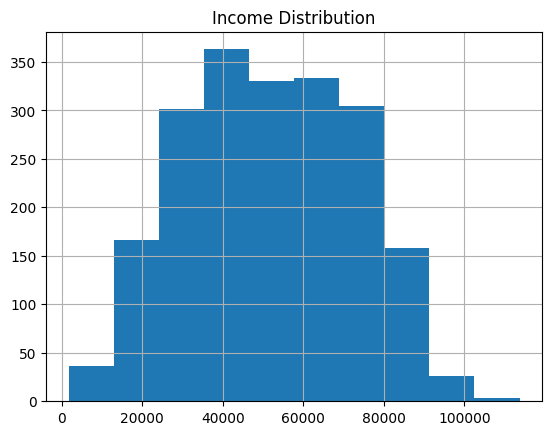

In [52]:
df["Income"].hist()
plt.title('Income Distribution')
plt.show()

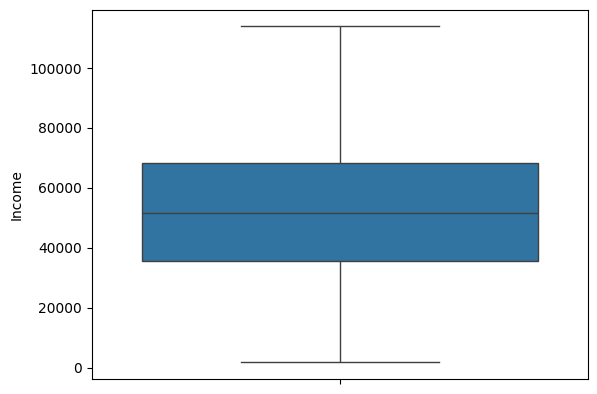

In [53]:
sns.boxplot(df['Income'])
plt.show()

In [54]:
# Coefficient of variation (CV)
df['Income'].std()/df['Income'].mean()


np.float64(0.4007379553227728)

In [55]:
df['Income'].skew()

np.float64(0.004357040710783565)

Our dataset shows well-divided salaries. A few people earn little, and a few earn a lot, but there are no outliers.
The dispersion, on the other hand, is large (many data points deviate from the mean).
Based on the skewness and the boxplot, we can say that, although not completely normal, the curve is close to a normal distribution.

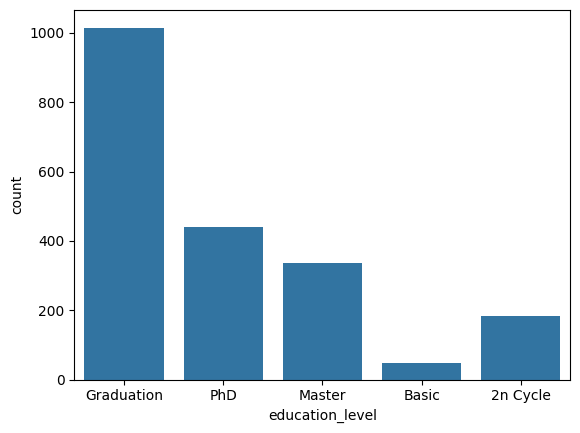

In [56]:
sns.countplot(x=df["education_level"])
plt.show()

Most of our clients have completed a bachelor's degree. Few clients have only completed basic education.
In general, we can say that our clients have higher levels of education.

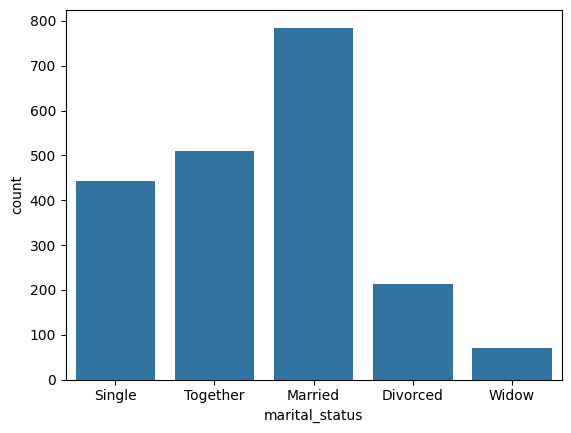

In [57]:
sns.countplot(x=df["marital_status"])
plt.show()

Most of our customers are married or living together. Few are widowed.

How the data correlates:

- What is the relationship between marital status and number of children? Do married people have more children?
- Do people spend more or less on our platform when they have children?
- Do people with higher salaries spend more?


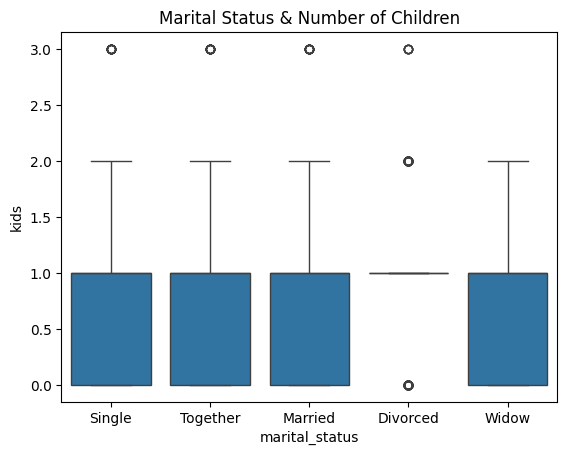

In [58]:
ax = sns.boxplot(x='marital_status', y='kids', data=df)
ax.set_title('Marital Status & Number of Children')
plt.show()


In [59]:
df.groupby('marital_status')['kids'].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,214.0,1.023364,0.753344,0.0,1.0,1.0,1.0,3.0
Married,785.0,0.977070,0.724558,0.0,0.0,1.0,1.0,3.0
Single,443.0,0.860045,0.771850,0.0,0.0,1.0,1.0,3.0
Together,509.0,0.982318,0.748806,0.0,0.0,1.0,1.0,3.0
Widow,70.0,0.842857,0.734960,0.0,0.0,1.0,1.0,2.0


In [60]:
df.groupby('marital_status')['kids'].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Although the numbers are very close, looking only at the average, we can say that singles have fewer children compared to the other groups.
However, as we can see in the boxplot and the median, the numbers are very close to each other.
We would need a hypothesis test to confirm any differences.

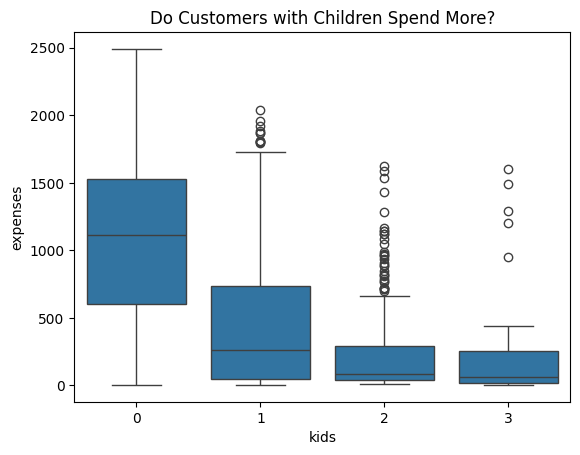

In [61]:
ax = sns.boxplot(x='kids', y='expenses', data=df)
ax.set_title('Do Customers with Children Spend More?')
plt.show()


In [62]:
df.groupby('kids')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,567.0,1056.282187,622.282197,5.0,605.5,1114.0,1531.50,2491.0
1,1027.0,432.732230,450.304666,4.0,50.5,265.0,735.50,2036.0
2,382.0,223.267016,295.568285,8.0,39.0,84.0,295.75,1627.0
3,45.0,240.044444,407.638708,6.0,19.0,62.0,254.00,1601.0


In [63]:
df.groupby('kids')['expenses'].median()

kids
0    1114.0
1     265.0
2      84.0
3      62.0
Name: expenses, dtype: float64


We can see that both the average and the median for 0 and 1 child are higher in this data sample. However, the average for 2 children is lower than for 3 children, while the median for 2 children is higher than for 3 children.
Both the 2-child and 3-child groups have averages much higher than the median, indicating upper outliers (which the graph itself already shows). The 1-child group also has upper outliers, but this difference is less pronounced.
People with no children have a distribution that is somewhat more similar to a normal distribution (no outliers, and the median is slightly centered in the middle of the boxplot).

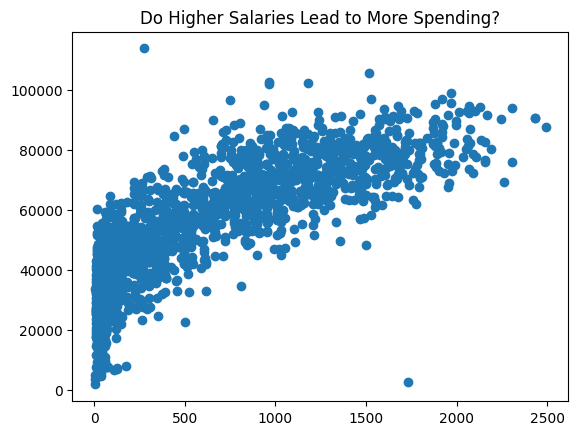

In [64]:
plt.scatter(df["expenses"], df["Income"])
plt.title('Do Higher Salaries Lead to More Spending?')
plt.show()


In [65]:
df["expenses"].corr(df["Income"])

np.float64(0.8192029927546332)

Apparently, there is a directly proportional correlation, where people who earn more also spend more.